In [3]:
from numpy import linalg as LA
import matplotlib.pyplot as plt
import sys
import os, shutil                         # For issuing commands to the OS.
from os import listdir
from os.path import isfile, join
import time
import random
from matplotlib.font_manager import FontProperties
import pandas as pd
import csv
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
import datetime
from scipy.optimize import curve_fit
from scipy.stats import bernoulli
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#from sklearn.metrics import confusion_matrixfrom sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import brier_score_loss
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from io import BytesIO
import boto3
import urllib
import netCDF4 as nc
from netCDF4 import MFDataset
import urllib.request
from time import sleep
import requests
from netCDF4 import Dataset
import timeit

#import ccgfilt_cor
plt.ion() 

In [4]:
def Regression_line(arr_x,arr_y,l):
             axes = plt.gca()
             slope, intercept, r_value1, p_value, std_err = stats.linregress(arr_x,arr_y)
             #x_line = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],16)
             x_line = np.linspace(min(arr_x),max(arr_x),l) 
             #print 'k',slope,'std',std_err
             #print 'k+std',(slope+std_err)
             #print 'k-std',(slope-std_err)
             Regr_line = slope*x_line + intercept
             Regr_plus_err = (slope+std_err)*x_line + intercept 
             Regr_minus_err = (slope-std_err)*x_line + intercept 
             return slope,x_line,Regr_line,Regr_plus_err,Regr_minus_err,std_err

analysis for years [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
(40,)
shape [(365,), (366,), (365,), (365,), (365,), (366,), (365,), (365,), (364,), (366,), (365,), (365,), (365,), (366,), (365,), (365,), (365,), (366,), (365,), (365,), (365,), (366,), (364,), (365,), (365,), (366,), (365,), (365,), (365,), (366,), (365,), (365,), (365,), (366,), (365,), (365,), (365,), (366,), (365,), (212,)]
concatenate circulation
shape of concatenated circ (14455,)
plot
shortterm 300
dinterval 0.002739726027397254
<class 'int'>
<class 'int'>


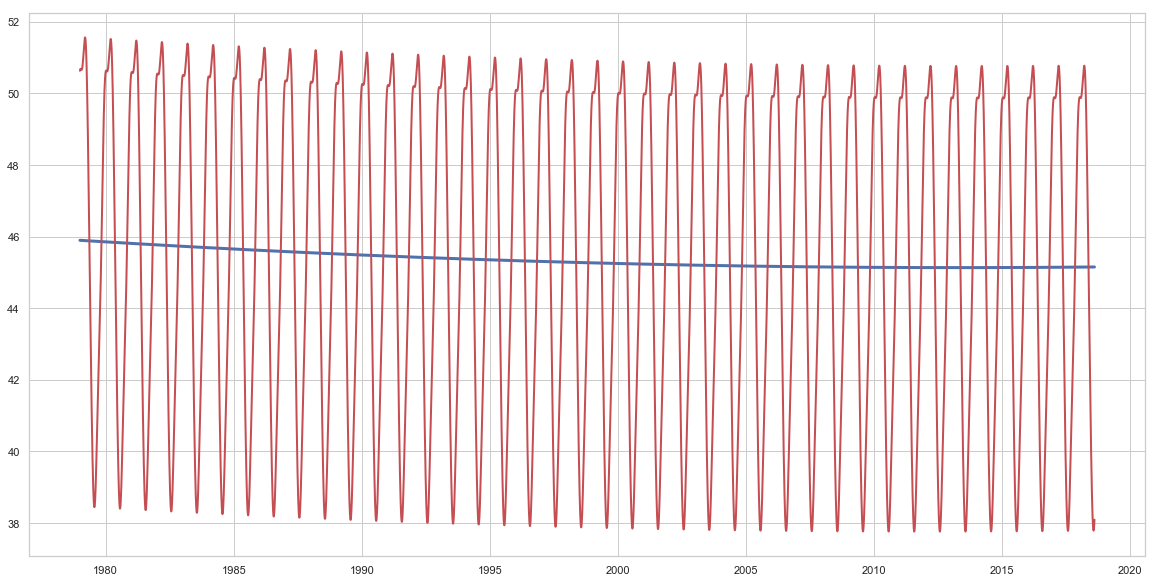

In [6]:
import ccgfilt_corr2
%matplotlib inline
#dir = '/Volumes/Seagate Backup Plus Drive/meteo-badc/ggap/' # 1979-1993 (1995-2003)
#year_list = [(year0+i) for i in range(40)]

#cutoff = 100# np.array([80,40])

year0=1979

year_list = [(year0+i) for i in range(40)]

print('analysis for years', year_list)

total_cir = [np.loadtxt('Circ1_'+str(j)+'.txt') for j in year_list] #- result is [nparray(365,3) , nparray(366,3) , ...]
print(np.shape(total_cir))
print('shape',[np.shape(x) for x in total_cir])
print('concatenate circulation')

total_cir = np.concatenate(total_cir,axis=0)
print('shape of concatenated circ',np.shape(total_cir))
time_len = [np.shape(x) for x in total_cir]

time = np.array([1979+t/365. for t in range(len(time_len))])



print('plot')

# Smoothing

obj = ccgfilt_corr2.ccgFilter(time, total_cir,shortterm=300,longterm=10000) #shortterm = 40, numpolyterms = 4 filename.classname

sc_cir = obj.getSmoothValue(time)
trend_cir  = obj.getTrendValue(time)
ampl_cir = obj.getAmplitudes()
fun_cir = obj.getFunctionValue(time)
poly_cir = obj.getPolyValue(time)

#slope_ampt_o18,x_line_ampt_o18,Regr_line_ampt_o18,Regr_plus_err_amp_o18,Regr_minus_err_ampt_o18,std_ampt_o18 = Regression_line(year_o18,amplit_o18,len(amplit_o18)) 
#plt.plot(time, amplit_cos[:c],'b*',markersize=5.0)                                                                                                 
#plt.plot(year_cos[:c],Regr_line_ampt_cos[:c],'b-',linewidth =1.0,label=('k = %4.2f +/- %4.2f' %(slope_ampt_cos,std_ampt_cos)))                                            
                                                    


plt.figure(figsize=(20,10)) 
#plt.plot(time ,total_cir,'y-',markersize=0.1,label='data')
#plt.plot(time , sc_cir,'r-',linewidth=2.0,label = 'smooth cutoff = %d' %cutoff)                                                      
#plt.plot(time , trend_cir,'b-',linewidth=3.0)  #, label = 'trend cutoff = %d' %longterm)
plt.plot(time , poly_cir,'b-',linewidth=3.0, label = 'poly') 
plt.plot(time , fun_cir,'r-',linewidth=2.0, label = 'function') 

plt.savefig("Circulation_total_poly_and_fct_lat40-90_.png")


#shape [(365,), (366,), (365,), (365,), (365,), (366,), (365,), (365,), (364,), (366,)]
#concatenate circulation
#shape of concatenated circ (3652,)
#time 3652
